In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import types

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# ==========================================================
#
# Dataset loading
#
mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


/Users/JH/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# ==========================================================
#
# Set up model
#

# 28*28 pixels -> 28^2 x(features) -> 784 features
x = tf.placeholder(tf.float32, [None, 784])
    # None -> unlimited

# To get a one y(output), there should be same number of W(weights) compares to x
# There should be 10 kinds of y,
# So W has a bimension of  784*10
W = tf.Variable(tf.zeros([784, 10]))

# b(bias) of each hypothesis for each target(label)
b = tf.Variable(tf.zeros([10]))

# Hypothesis + Softmax
y = tf.nn.softmax(tf.matmul(x, W) + b)

# y는 우리가 예측한 확률 분포이고, y_ 는 실제 분포 (우리가 입력할 one-hot 벡터)
y_ = tf.placeholder(tf.float32, [None, 10])

# Cost Function( = loss)
# cross_entropy = -tf.reduce_sum(y_*tf.log(y))
cross_entropy = tf.reduce_sum(y_*(-tf.log(y)))
    # ndarray로 행렬의 성분곱을 연산자 *만으로 간단히 실행 
    # labeled vector와 (-tf.log(y))의 곱으로 Cost를 정의

# Gradient Descent
# tf.train.GradientDescentOptimizer(learning_rate)
# tf.train.Optimizer.minimize(loss)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [3]:
# ==========================================================
#
# Learning
#

# Session
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

# Learning
# 100 개씩 뭉쳐와서 Learning 실행
# each row of batch_xs stands for each number of image(pixel data)
# each row of batch_ys stands for its label
for i in range(1000):
	batch_xs, batch_ys = mnist.train.next_batch(100)
    # stochastic training
	sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# Do not close session at this point
# We just finish train the model with training set
# We are going to use this session again in testing procedure. 
# sess.close()

In [4]:
batch_xs.shape

(100, 784)

In [5]:
batch_xs[0]
# 28*28 pixels

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

image # 1


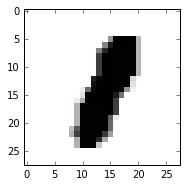

image # 2


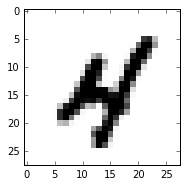

image # 3


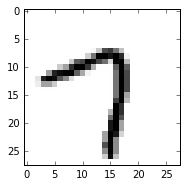

image # 4


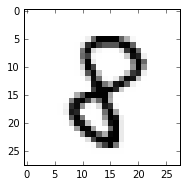

image # 5


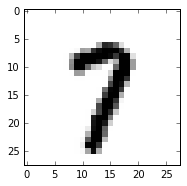

In [6]:
for i in range(0, 5):
    x_temp = batch_xs[i]

    plt.figure(figsize=(2.8, 2.8))
    plt.imshow(x_temp.reshape(28, 28), cmap=plt.cm.gray_r,
               interpolation='none')
    print 'image # %d' %(i+1)
    plt.show()

In [7]:
batch_ys.shape

(100, 10)

In [8]:
batch_ys[0]
# labeled vector

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [9]:
# ==========================================================
#
# Validation & Result
#

# Validation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# tf.argmax(input, dimension, name=None)
    # Returns: A Tensor of type int64.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Result should be approximately 91%.
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

sess.close()

0.9178
